# ML Course 7 - Practice on discriminant analysis

We will work here on a data set taken from Scikit-Learn about the characteristics of malignant and benign breast tumors to prevent the risk of cancer.

## Preparation of the data set

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import seaborn as sns

**Loading the data set from Scikit-Learn**

In [4]:
from sklearn.datasets import load_breast_cancer
data_all = load_breast_cancer()

**Checking the keys of the dictionary loaded**

In [5]:
data_all.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

**Getting a description of the data set**

In [6]:
print(data_all.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Preparing the data frame of all features**

In [7]:
data_all.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
features = pd.DataFrame(data=data_all.data, columns=data_all.feature_names)
features.sample(n=8, random_state=1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
421,14.69,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.46,18.34,114.10,809.2,0.13120,0.36350,0.3219,0.11080,0.2827,0.09208
47,13.17,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,15.67,27.95,102.80,759.4,0.17860,0.41660,0.5006,0.20880,0.3900,0.11790
292,12.95,16.02,83.14,513.7,0.10050,0.07943,0.06155,0.03370,0.1730,0.06470,...,13.74,19.93,88.81,585.4,0.14830,0.20680,0.2241,0.10560,0.3380,0.09584
186,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.3538,0.15710,0.3206,0.06938
414,15.13,29.81,96.71,719.5,0.08320,0.04605,0.04686,0.02739,0.1852,0.05294,...,17.26,36.91,110.10,931.4,0.11480,0.09866,0.1547,0.06575,0.3233,0.06165
132,16.16,21.54,106.20,809.8,0.10080,0.12840,0.10430,0.05613,0.2160,0.05891,...,19.47,31.68,129.70,1175.0,0.13950,0.30550,0.2992,0.13120,0.3480,0.07619
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.03,17.81,146.60,1495.0,0.11240,0.20160,0.2264,0.17770,0.2443,0.06251
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.11030,0.05778,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.19630,0.2535,0.09181,0.2369,0.06558


**Preparing the data frame of the target**

In [9]:
target = pd.DataFrame(data=data_all.target, columns=['tumor type'])
target.sample(n=8, random_state=1)

,tumor type
421,1
47,0
292,1
186,0
414,0
132,0
161,0
197,0


In [10]:
data_all.target_names

array(['malignant', 'benign'], dtype='<U9')

**To make it easier to do visual check of the data, we remove the encoding**

In [11]:
target = target.replace({0:data_all.target_names[0], 1:data_all.target_names[1]})
target.sample(n=8, random_state=1)

,tumor type
421,benign
47,malignant
292,benign
186,malignant
414,malignant
132,malignant
161,malignant
197,malignant


## Subject

* As a start, we consider mean radius as unique predictor and we will compute a Linear Discrimant Analysis by hand.
  * Plot the data set on one axis (the mean radius axis) and give colors to distinguish the tumor type of each dot (i.e. each class)
  * Compute the estimated center of each class, i.e. $\hat{\mu}_k$ for $k \in \left\{0, 1\right\}$ (0 coding benign and 1 coding malignant). Add the center dots on your plot.
  * Compute the estimated prior $\hat{\pi}_k$ and variance $\hat{\sigma}_k^2$ of each class.
  * Plot the posterior of each class, i.e. the probability that a new observation comes from class $k$, knowing its mean radius value. We assume that these probality function follows a Gaussian distribution whose parameters have been computed in the previous questions.
  * According to the plot, what approximate value(s) of mean radius corresponds to the decision boundary?
  * *Optional question: check that by solving the equation of discriminant equality $\delta_0\left(x\right) = \delta_1\left(x\right)$. To simplify the solving, you can consider that the standard deviations $\hat{\sigma}_k$ are the same (take the mean value of $\hat{\sigma}_k$).* 
  * Use LinearDiscriminantAnalysis (from sklearn.discriminant_analysis) to train a model and make several predictions around the decision boundary to check.
* We consider two predictors now: mean radius and mean texture.
  * Plot on a first figure the data in the 2D-predictor space with colors corresponding to the tumor type
  * Display on that first figure the decision areas based on the logistic regression classifier trained on the two predictors (see practice #6)
  * Train a Linear Discriminant Analysis on the two predictors and display the decision areas on a second figure
  * *Optional question: train a Quadratic Discriminant Analysis on the two predictors and display the decision areas on a third figure*
  * *Optional question: compare the performances of that three models*

In [12]:
features[['mean radius']].isnull().values.any()

False

In [13]:
import statsmodels.formula.api as sm # for OLS
from matplotlib.colors import ListedColormap # For visualising the classification space

from sklearn.preprocessing import LabelEncoder, OneHotEncoder # Encoding categorical data
from sklearn.model_selection import train_test_split # Splitting the data
from sklearn.preprocessing import StandardScaler # Feature scaling
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # Feature extraction
from sklearn.linear_model import LogisticRegression # Classification
from sklearn.metrics import confusion_matrix # Confusion matrix for test data


  * Plot the data set on one axis (the mean radius axis) and give colors to distinguish the tumor type of each dot (i.e. each class)


In [14]:
target = target.replace({0:data_all.target_names[0], 1:data_all.target_names[1]})
target.sample(n=8, random_state=1)

,tumor type
421,benign
47,malignant
292,benign
186,malignant
414,malignant
132,malignant
161,malignant
197,malignant


#### Plot the data set on one axis (the mean radius axis) and give colors to distinguish the tumor type of each dot (i.e. each class)

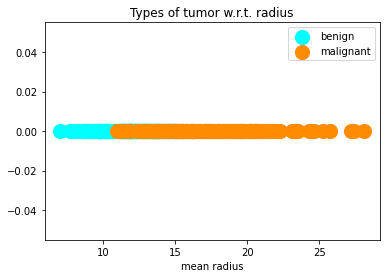

In [15]:
for i, j in enumerate(np.unique(target)):
    plt.scatter(features['mean radius'][target['tumor type'] == j], np.zeros(len(features['mean radius'][target['tumor type']==j])), marker='.',s = 800, color=ListedColormap(('darkorange', 'aqua'))(1-i), label=j)
plt.title('Types of tumor w.r.t. radius')    
plt.legend()
plt.xlabel('mean radius')
plt.show()

  * Compute the estimated center of each class, i.e. $\hat{\mu}_k$ for $k \in \left\{0, 1\right\}$ (0 coding benign and 1 coding malignant). Add the center dots on your plot.


In [15]:
features[:5]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
features['tumor_type'] = target

In [20]:
malignant_df = features[features['tumor_type'] == 'malignant']['mean radius']
benign_df = features[features['tumor_type'] == 'benign']['mean radius']

In [21]:
benign_df.sum()


4336.308999999999

In [22]:
len(benign_df)

357

In [23]:
malignant_df.sum()

3702.12

In [24]:
len(malignant_df)

212

In [25]:
mean_benign = benign_df.sum()/len(benign_df)
mean_benign

12.146523809523808

In [26]:
mean_malignant = malignant_df.sum()/len(malignant_df)
mean_malignant

17.462830188679245

#### Compute the estimated center of each class, i.e.  𝜇̂ 𝑘  for  𝑘∈{0,1}  (0 coding benign and 1 coding malignant). Add the center dots on your plot.

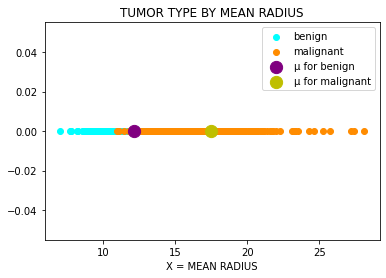

In [27]:
for i, j in enumerate(np.unique(target)):
    plt.scatter(features['mean radius'][target['tumor type'] == j], np.zeros(len(features['mean radius'][target['tumor type'] == j])), color=ListedColormap(('darkorange', 'aqua'))(1-i), label=j)
plt.scatter(mean_benign, 0, label='μ for benign ', color='purple', s=600, marker='.')    
plt.scatter(mean_malignant, 0, label='μ for malignant', s=600, color='y', marker='.')
plt.title('TUMOR TYPE BY MEAN RADIUS')
plt.xlabel('X = MEAN RADIUS')
plt.legend()
plt.show() 

#### Compute the estimated prior $\hat{\pi}_k$ and variance $\hat{\sigma}_k^2$ of each class.


In [28]:
prior_benign = len(benign_df)/len(features['mean radius'])
prior_malignant = len(malignant_df)/len(features['mean radius'])

print('Prior $\hat{\pi}_k$  for benign is: ' + str(prior_benign))
print('Prior $\hat{\pi}_k$ for malignant is: ' + str(prior_malignant))

Prior $\hat{\pi}_k$  for benign is: 0.6274165202108963
Prior $\hat{\pi}_k$ for malignant is: 0.37258347978910367


In [29]:
variance_benign = 1/(len(benign_df) -1) * sum((benign_df.values - mean_benign)**2)
variance_malignant = 1/(len(malignant_df) -1) * sum((malignant_df.values - mean_malignant)**2)
print('Variance for benign is: ' + str(variance_benign))
print('Variance2 for malignant is: ' + str(variance_malignant))



Variance for benign is: 3.170221722043871
Variance2 for malignant is: 10.265430814629344


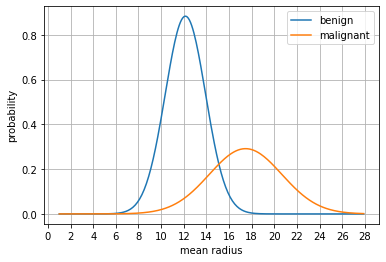

In [43]:
import math
def compute_gaussian_dstribution(x, mean, variance):
    return math.exp(-(1/2) * ((x-mean)/(math.sqrt(variance)))**2) * (1/math.sqrt(variance))* math.sqrt(2*math.pi)

x_benign = np.arange(1, 28, 0.1)
y_benign = [compute_gaussian_dstribution(x,mean_benign, variance_benign)*prior_benign for x in x_benign]

x_malignant = np.arange(1,28, 0.1)
y_malignant = [compute_gaussian_dstribution(x,mean_malignant, variance_malignant)*prior_malignant for x in x_malignant]

plt.plot(x_benign, y_benign, label='benign')
plt.plot(x_malignant, y_malignant, label='malignant')
plt.xticks(np.arange(0,30, 2))
plt.xlabel('mean radius')
plt.ylabel('probability')
plt.grid()
plt.legend()

#### According to the plot, what approximate value(s) of mean radius corresponds to the decision boundary?

It is at around 15. 

#### Use LinearDiscriminantAnalysis (from sklearn.discriminant_analysis) to train a model and make several predictions around the decision boundary to check.

**Scale the data**

In [30]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(target['tumor type'])
y[-5:]

array([1, 1, 1, 1, 0])

**Train and Split**

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features['mean radius'], y, test_size = 0.25, random_state = 0)

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train.values.reshape(-1, 1))
X_test = sc.transform(X_test.values.reshape(-1, 1))

In [95]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [96]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [97]:
print('===  LDA  ===')
print(label_encoder.inverse_transform(lda.predict(sc.transform([[10.42]]))))
print(label_encoder.inverse_transform(lda.predict(sc.transform([[15.42]]))))

print(label_encoder.inverse_transform(lda.predict(sc.transform([[16]]))))
print(label_encoder.inverse_transform(lda.predict(sc.transform([[30]]))))


===  LDA  ===
['benign']
['benign']
['malignant']
['malignant']


In [100]:
print('===  Logistic  ===')

print(label_encoder.inverse_transform(logistic_regression.predict(sc.transform([[10.42]]))))
print(label_encoder.inverse_transform(logistic_regression.predict(sc.transform([[15.42]]))))
print(label_encoder.inverse_transform(logistic_regression.predict(sc.transform([[16]]))))
print(label_encoder.inverse_transform(logistic_regression.predict(sc.transform([[30]]))))


===  Logistic  ===
['benign']
['malignant']
['malignant']
['malignant']


#### We consider two predictors now: mean radius and mean texture.
#### Plot on a first figure the data in the 2D-predictor space with colors corresponding to the tumor type

In [101]:
# X = features[['mean radius', 'mean texture']].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [172]:
X1 = features[['mean radius','mean texture']].values
Y1 = label_encoder.fit_transform(target['tumor type'])


x1_train, x1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size = 0.25, random_state = 0)

scaler = StandardScaler()
x1_train = scaler.fit_transform(x1_train)
x1_test = scaler.transform(x1_test)

In [173]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x1_train, y1_train)

LogisticRegression()

In [174]:
lda2 = LinearDiscriminantAnalysis()
lda2.fit(x1_train, y1_train)

LinearDiscriminantAnalysis()

In [175]:
log_y_pred = logistic_regression.predict(x1_test)

In [176]:
lda2_y_pred = lda2.predict(x1_test)

In [177]:
log_y_pred[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [178]:
lda2_y_pred[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1])

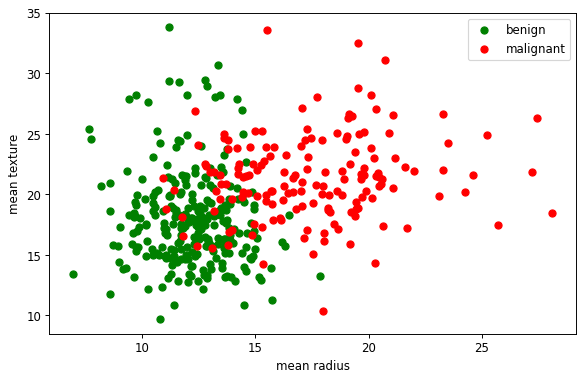

In [179]:
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(8,5), dpi = 85)
X_set, y_set = scaler.inverse_transform(x_train), label_encoder.inverse_transform(y_train)

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=ListedColormap(('red', 'green'))(1-i), label=j)

plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.legend()
plt.show()

[[ 7.729 17.729  7.729 17.729  7.729 17.729]
 [10.72  10.72  20.72  20.72  30.72  30.72 ]]
[[ 7.729 17.729  7.729 17.729  7.729 17.729]
 [10.72  10.72  20.72  20.72  30.72  30.72 ]]


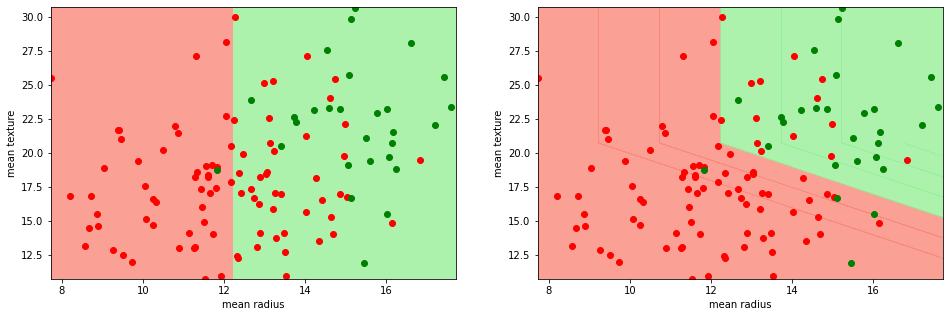

In [180]:
classifier_list = [logistic_regression, lda2]

from matplotlib.colors import ListedColormap

# Prepare feature grid
fig, axs = plt.subplots(1,len(classifier_list), figsize=(16,5))
X_set, y_set = scaler.inverse_transform(x_test), label_encoder.inverse_transform(y_test)

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 10),
    np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 10))

# Loop on classifier 
for i_axs, classifier in enumerate(classifier_list):
#     print(len(classifier.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)[0]))
    print(np.array([X1.ravel(), X2.ravel()]))
    axs[i_axs].contourf(X1, 
                        X2, 
                        classifier.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
                        alpha = 0.75,
                        cmap = ListedColormap(('salmon','lightgreen')))
    
    for i, j in enumerate(np.unique(y_set)):
        axs[i_axs].scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
    axs[i_axs].set_xlim(X1.min(), X1.max())
    axs[i_axs].set_ylim(X2.min(), X2.max())
    axs[i_axs].set_xlabel('mean radius')
    axs[i_axs].set_ylabel('mean texture')
    

plt.show() 

In [218]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


**LDA with one feature**

In [219]:
LDA =lda.predict_proba(X_test)
LDA[:10]

array([[0.85299494, 0.14700506],
       [0.87249062, 0.12750938],
       [0.77211147, 0.22788853],
       [0.73341307, 0.26658693],
       [0.8888808 , 0.1111192 ],
       [0.97196545, 0.02803455],
       [0.94929857, 0.05070143],
       [0.96207519, 0.03792481],
       [0.99874502, 0.00125498],
       [0.98882755, 0.01117245]])

**LDA with two feature**

In [220]:
LDA2 =lda2.predict_proba(x1_test)
LDA2[:10]

array([[0.82555195, 0.17444805],
       [0.65851136, 0.34148864],
       [0.89204674, 0.10795326],
       [0.7929056 , 0.2070944 ],
       [0.91241309, 0.08758691],
       [0.97709341, 0.02290659],
       [0.90212439, 0.09787561],
       [0.96549804, 0.03450196],
       [0.99509693, 0.00490307],
       [0.99615112, 0.00384888]])

**Logistic Regression**

In [221]:
log = logistic_regression.predict_proba(x1_test)
LDA[:10]

array([[0.85299494, 0.14700506],
       [0.87249062, 0.12750938],
       [0.77211147, 0.22788853],
       [0.73341307, 0.26658693],
       [0.8888808 , 0.1111192 ],
       [0.97196545, 0.02803455],
       [0.94929857, 0.05070143],
       [0.96207519, 0.03792481],
       [0.99874502, 0.00125498],
       [0.98882755, 0.01117245]])

In [222]:
y_pred_lda = lda.predict(X_test)
print(np.concatenate((y_pred_lda.reshape(len(y_pred_lda),1), y_test.reshape(len(y_test),1)),axis=1)[:10])

[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [223]:
y_pred_lda2 = lda2.predict(x1_test)
print(np.concatenate((y_pred_lda2.reshape(len(y_pred_lda2),1), y_test.reshape(len(y_test),1)),axis=1)[:10])

[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [224]:
y_pred_log = logistic_regression.predict(x1_test)
print(np.concatenate((y_pred_lda2.reshape(len(y_pred_lda2),1), y_test.reshape(len(y_test),1)),axis=1)[:10])

[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [225]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_lda2)
print(cm)

[[85  5]
 [10 43]]


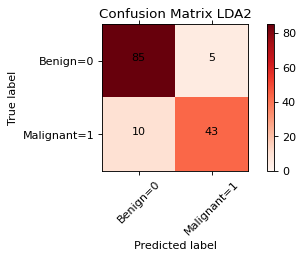

In [226]:
fig = plt.figure(figsize=(5,3), dpi= 80)
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(cm, cmap = plt.cm.Reds, vmin=0)
fig.colorbar(cax)
classes=['Benign=0','Malignant=1']
ticks = np.arange(len(classes))
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="black")
plt.xticks(ticks, classes, rotation=45)
ax.tick_params(axis="x", labelbottom=True, labeltop=False)
plt.yticks(ticks, classes)
plt.tight_layout()
plt.title('Confusion Matrix LDA2')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [227]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_log)
print(cm)

[[83  7]
 [ 7 46]]


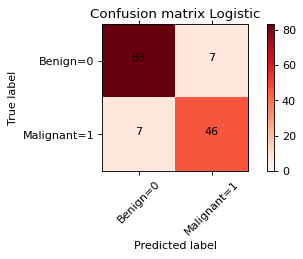

In [228]:
fig = plt.figure(figsize=(5,3), dpi= 80)
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(cm, cmap = plt.cm.Reds, vmin=0)
fig.colorbar(cax)
classes=['Benign=0','Malignant=1']
ticks = np.arange(len(classes))
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j]),
                 horizontalalignment="center",
                 color="black")
plt.xticks(ticks, classes, rotation=45)
ax.tick_params(axis="x", labelbottom=True, labeltop=False)
plt.yticks(ticks, classes)
plt.tight_layout()
plt.title('Confusion matrix Logistic')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [229]:
print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy_score(y_test, y_pred_lda2),2)))
print('Precision (proportion of true purchases among purchase predictions) is ' + str(round(precision_score(y_test, y_pred_lda2),2)))
print('Recall (proportion of true purchases that are correctly predicted) is ' + str(round(recall_score(y_test, y_pred_lda2),2)))

Accuracy (proportion of correct predictions) is 0.9
Precision (proportion of true purchases among purchase predictions) is 0.9
Recall (proportion of true purchases that are correctly predicted) is 0.81


In [230]:
print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy_score(y_test, y_pred_log),2)))
print('Precision (proportion of true purchases among purchase predictions) is ' + str(round(precision_score(y_test, y_pred_log),2)))
print('Recall (proportion of true purchases that are correctly predicted) is ' + str(round(recall_score(y_test, y_pred_log),2)))

Accuracy (proportion of correct predictions) is 0.9
Precision (proportion of true purchases among purchase predictions) is 0.87
Recall (proportion of true purchases that are correctly predicted) is 0.87


In [231]:
print('Accuracy (proportion of correct predictions) is ' + str(round(accuracy_score(y_test, y_pred_lda),2)))
print('Precision (proportion of true purchases among purchase predictions) is ' + str(round(precision_score(y_test, y_pred_lda),2)))
print('Recall (proportion of true purchases that are correctly predicted) is ' + str(round(recall_score(y_test, y_pred_lda),2)))

Accuracy (proportion of correct predictions) is 0.89
Precision (proportion of true purchases among purchase predictions) is 0.95
Recall (proportion of true purchases that are correctly predicted) is 0.74


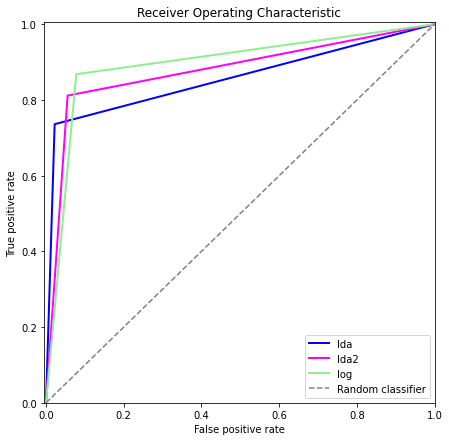

In [236]:
from sklearn.metrics import roc_curve, roc_auc_score


plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve for LDA
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_lda)
plt.plot(false_positive_rate, true_positive_rate, c='blue', linewidth=2, label='lda')
# Plot ROC curve for Decision Tree
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_lda2)
plt.plot(false_positive_rate, true_positive_rate, c='magenta', linewidth=2, label='lda2')
# Plot ROC curve for SVM
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_log)
plt.plot(false_positive_rate, true_positive_rate, c='lightgreen', linewidth=2, label='log')
# Plot ROC curve for a random classifier
plt.plot([0, 1], ls='--', c='grey', label='Random classifier')
plt.xlim([-0.005, 1])
plt.ylim([0, 1.005])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()